In [1]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = 'C:\dev\Ybigta_assignment\0116 assignment\diamonds.csv' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [4]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

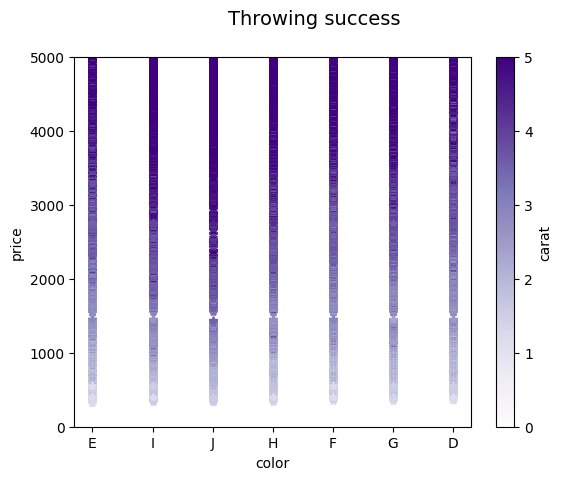

In [5]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [ ]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

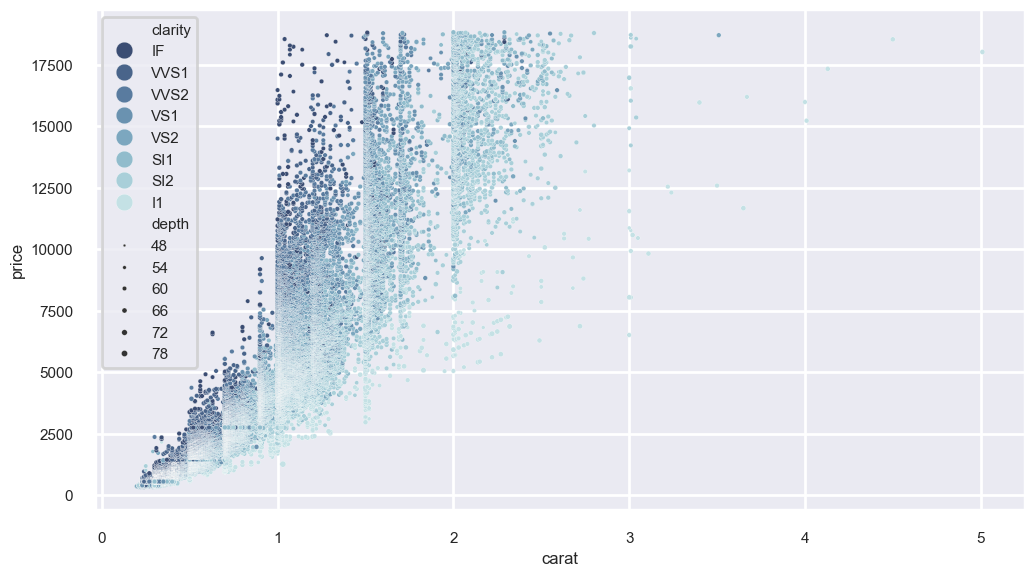

In [ ]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

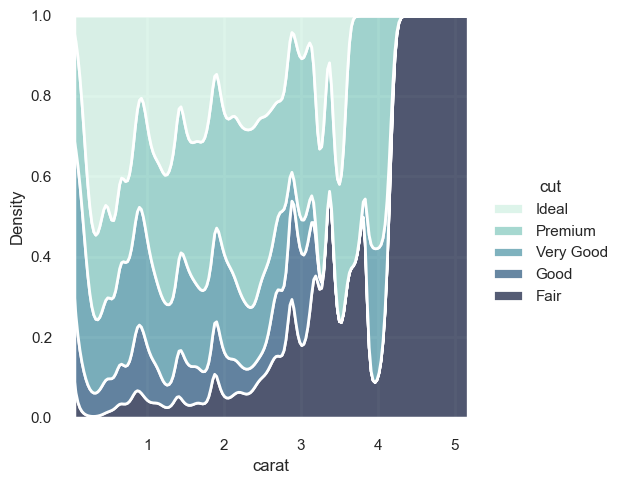

In [ ]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* (1) 1번 그래프의 경우에는 다이아몬드의 색상과 캐럿에 따른 가격의 변화를 보여주는 것으로 추정된다. 2번 그래프는 clarity와 depth에 따른 다이아몬드의 무게와 가격 간의 관계를 시각적으로 보여주고 있다. 또, clarity에 따른 패턴을 확인하고자 하고 있다. 3번 그래프는 carat에 따른 각 cut 수준들의 밀도를 보여주고 있다.  

* (2) 1번 그래프는 cut, clarity 등 중요한 변수가 고려되지 않았다. 따라서 개선을 위해선 적절한 명목형 변수에 대한 시각적 표현이 필요하다. 또 carat을 색상으로 표현하였으나 pointer들 간의 간격이 지나치게 촘촘하여 color에 따른 carat의 분포가 잘 보이지 않는다. 더욱 명확한 시각화를 제공해야할 필요가 있다. 2번의 경우, 점의 크기 조절에 대한 설명을 더 추가하여 해석을 더욱 쉽게 할 수 있으며, 그래프에 제목과 축 레이블을 추가하여 가독성을 향상할 수 있다. 3번 그래프 역시 그래프에 제목이 없다. 제목을 설정하여 가독성을 향상시킬 수 있다. 

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

* 2번 그래프에 제목과 레이블을 추가하고 depth를 명확히 드러낼 수 있게끔 점의 크기를 조정하였다.

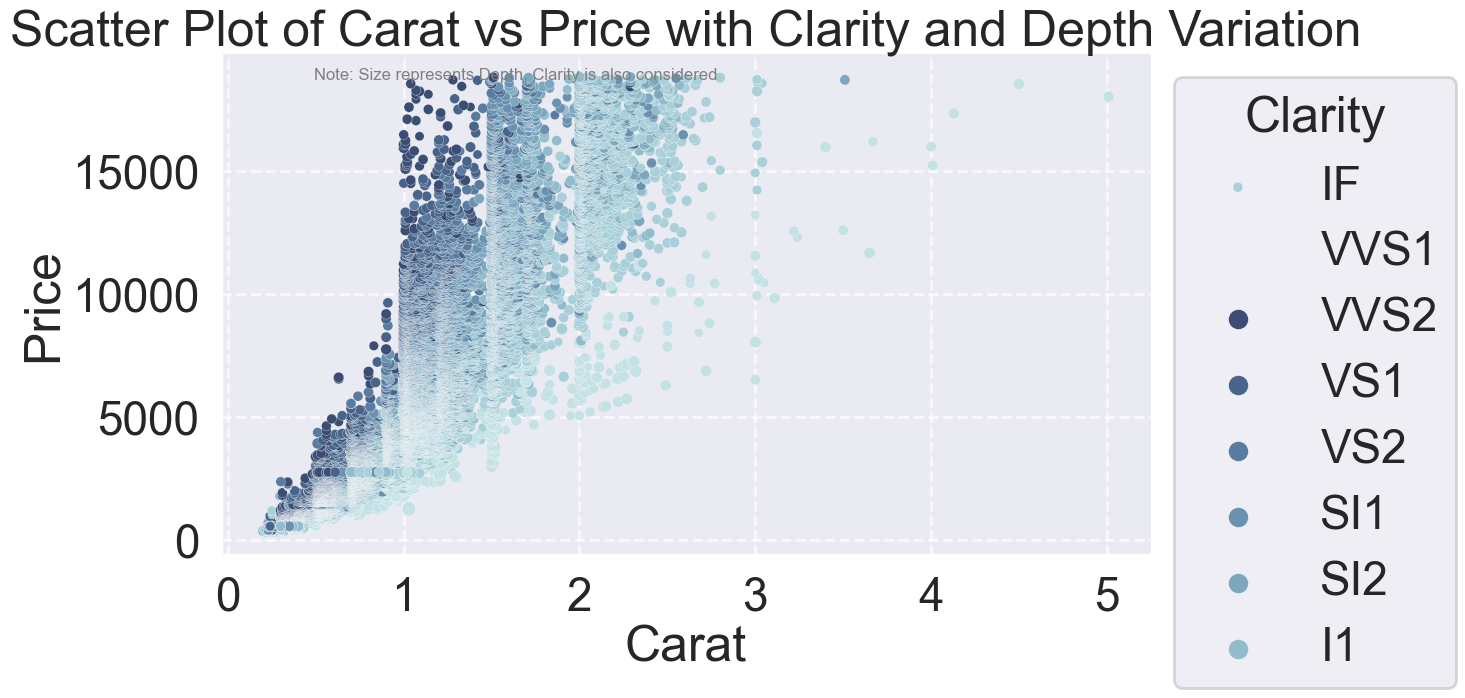

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 테마 설정
sns.set_theme(context='poster', style='darkgrid', font_scale=1.5)

# clarity 랭킹 설정
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

# 산점도 그리기
f, ax = plt.subplots(figsize=(12, 6.5))
sns.scatterplot(
    x="carat",
    y="price",
    hue="clarity",
    size="depth",  
    palette="ch:r=-.2,d=.3_r",
    hue_order=clarity_ranking,
    sizes=(1, 100),  # 점의 크기 범위를 더 명확하게 조절
    linewidth=0.2,
    data=df,
    ax=ax
)

# 명목형 데이터에 대한 범례 위치 및 제목 조정
ax.legend(title='Clarity', loc='upper left', bbox_to_anchor=(1, 1), labels=clarity_ranking)

# x, y 축 레이블과 제목 추가
ax.set_xlabel("Carat")
ax.set_ylabel("Price")
ax.set_title("Scatter Plot of Carat vs Price with Clarity and Depth Variation")  # 제목 수정

# 그리드 및 테두리 선 조정
ax.grid(True, linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Depth에 대한 설명 추가
ax.text(0.1, 0.95, "Note: Size represents Depth, Clarity is also considered", transform=ax.transAxes, fontsize=12, color='gray')

# 그래프 출력
plt.show()


# 시각화 공통과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.

In [ ]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.